Short data analysis for the recipe data found at:
https://www.kaggle.com/datasets/irkaal/foodcom-recipes-and-reviews?select=recipes.csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

food_com_recipe_data = pd.read_csv('./drive/MyDrive/CS3891/Data/recipes.csv')

print(food_com_recipe_data.columns)

Index(['RecipeId', 'Name', 'AuthorId', 'AuthorName', 'CookTime', 'PrepTime',
       'TotalTime', 'DatePublished', 'Description', 'Images', 'RecipeCategory',
       'Keywords', 'RecipeIngredientQuantities', 'RecipeIngredientParts',
       'AggregatedRating', 'ReviewCount', 'Calories', 'FatContent',
       'SaturatedFatContent', 'CholesterolContent', 'SodiumContent',
       'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent',
       'RecipeServings', 'RecipeYield', 'RecipeInstructions'],
      dtype='object')


In [ ]:
# Check out all columns
print(food_com_recipe_data.columns)

# Make a histogram of recipe categories
food_com_recipe_data['RecipeCategory'].value_counts()

Index(['RecipeId', 'Name', 'AuthorId', 'AuthorName', 'CookTime', 'PrepTime',
       'TotalTime', 'DatePublished', 'Description', 'Images', 'RecipeCategory',
       'Keywords', 'RecipeIngredientQuantities', 'RecipeIngredientParts',
       'AggregatedRating', 'ReviewCount', 'Calories', 'FatContent',
       'SaturatedFatContent', 'CholesterolContent', 'SodiumContent',
       'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent',
       'RecipeServings', 'RecipeYield', 'RecipeInstructions'],
      dtype='object')


RecipeCategory
Dessert                 62072
Lunch/Snacks            32586
One Dish Meal           31345
Vegetable               27231
Breakfast               21101
                        ...  
Main Dish Casseroles        1
Potato Soup                 1
Broccoli Soup               1
Apple Pie                   1
Labor Day                   1
Name: count, Length: 311, dtype: int64

       TotalTime  TotalTimeConverted
0       PT24H45M                1485
1        PT4H25M                 265
2          PT35M                  35
3       PT24H20M                1460
4          PT50M                  50
...          ...                 ...
522512   PT1H35M                  95
522513   PT3H30M                 210
522514      PT4H                 240
522515     PT15M                  15
522516     PT40M                  40

[522517 rows x 2 columns]


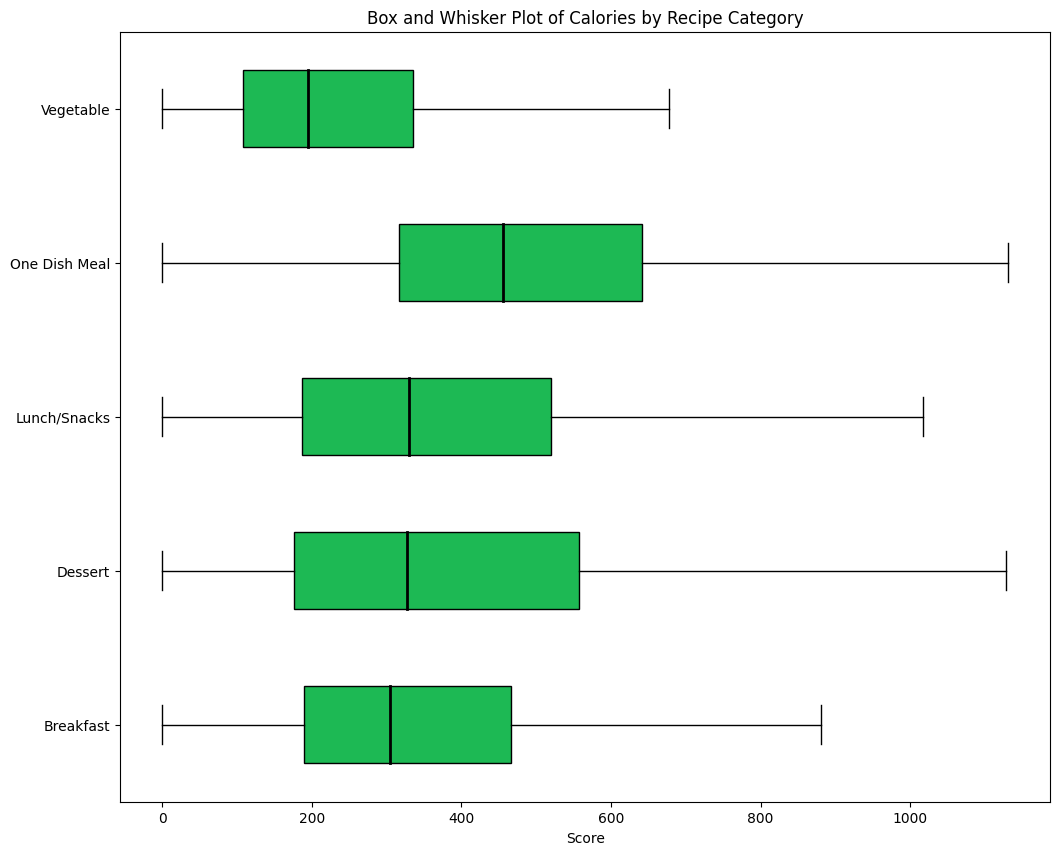

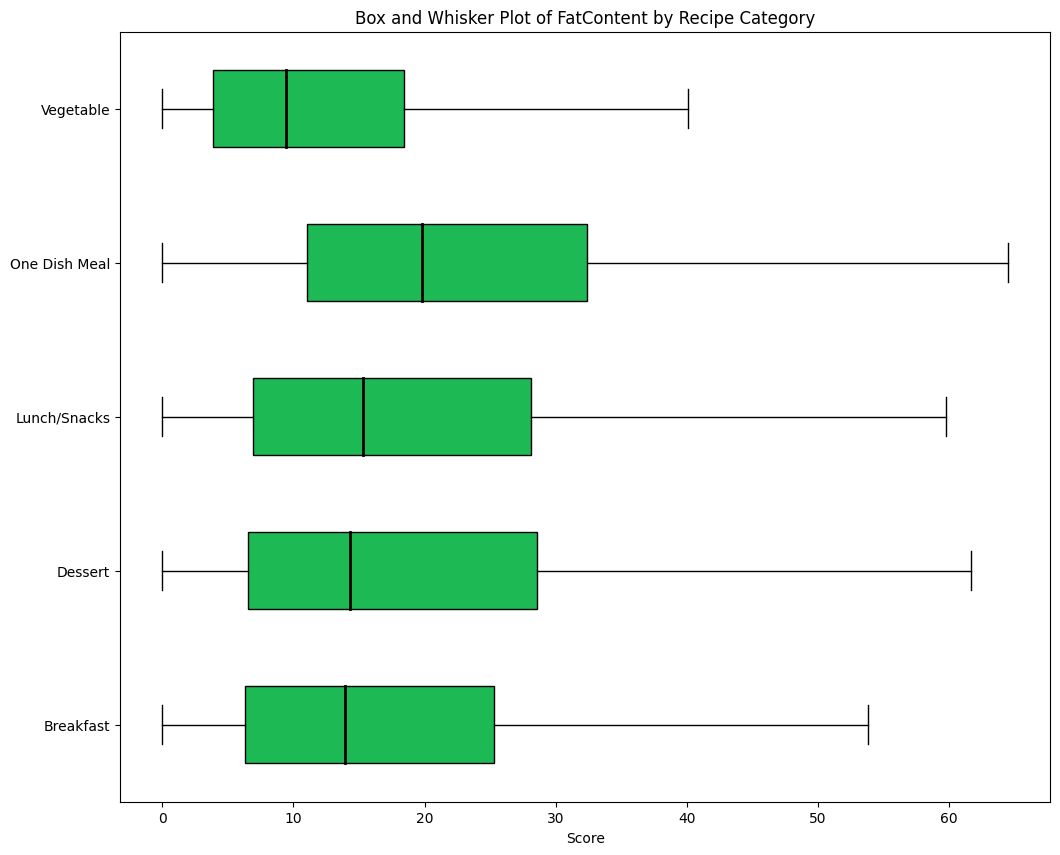

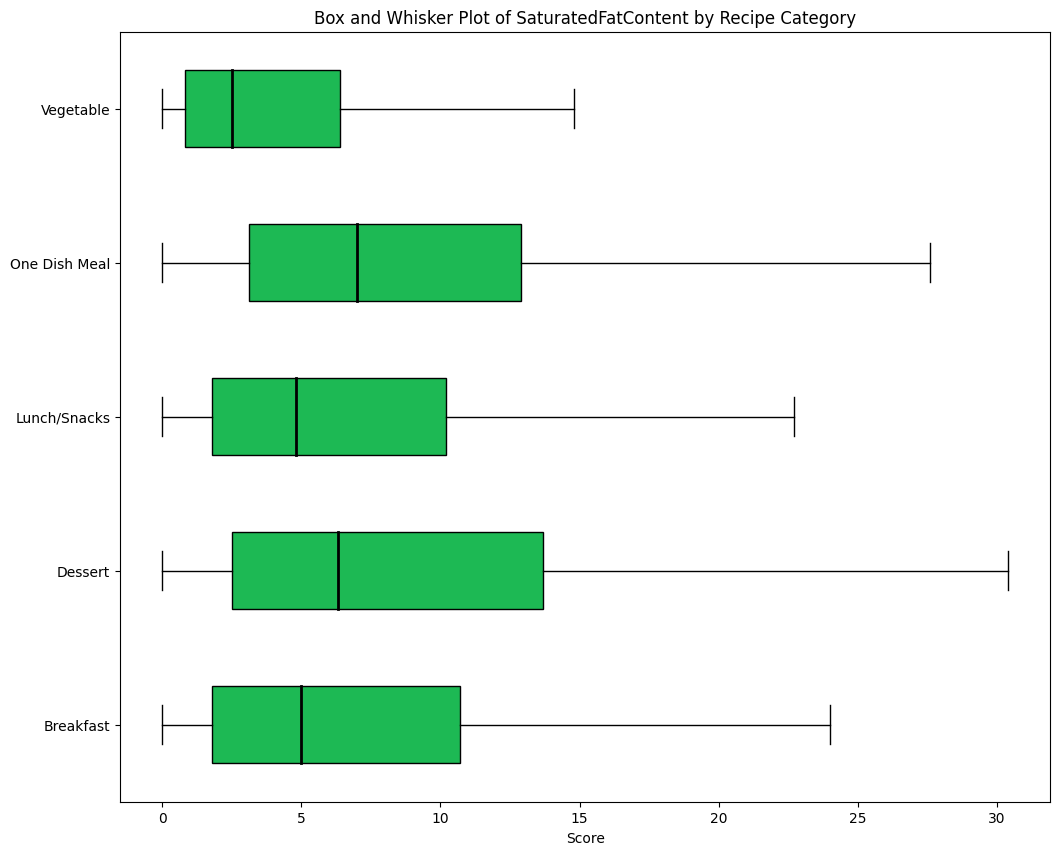

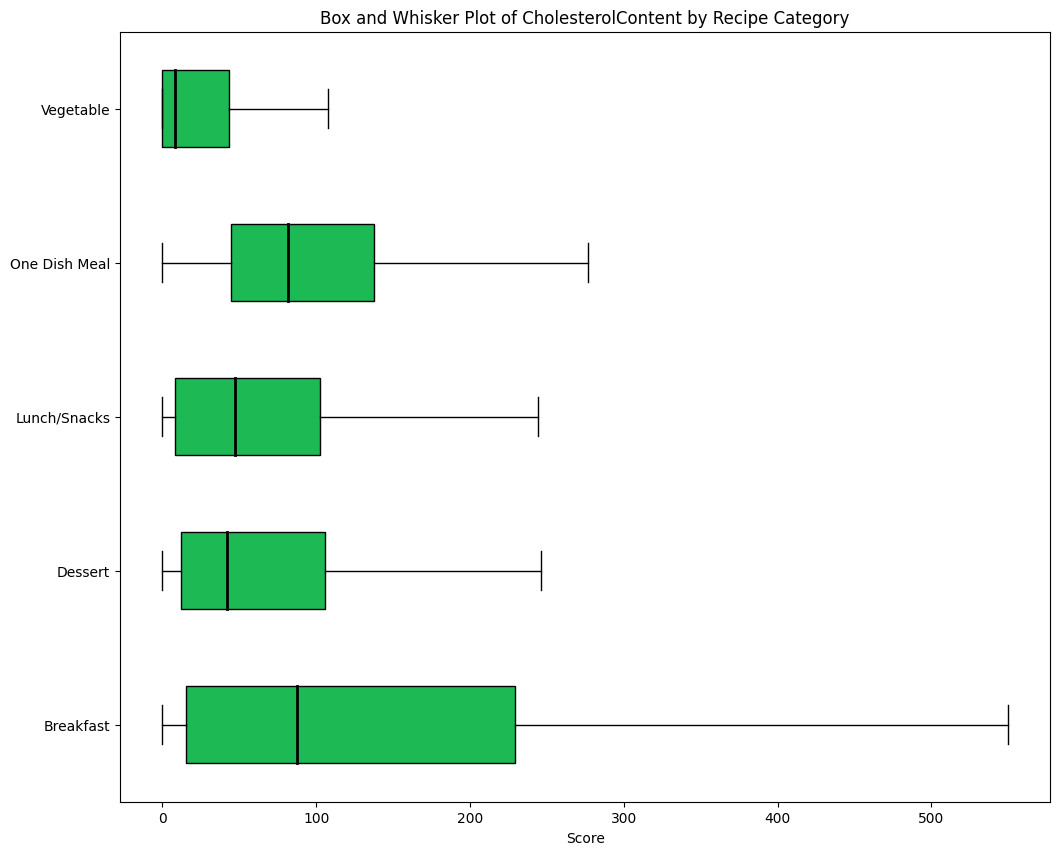

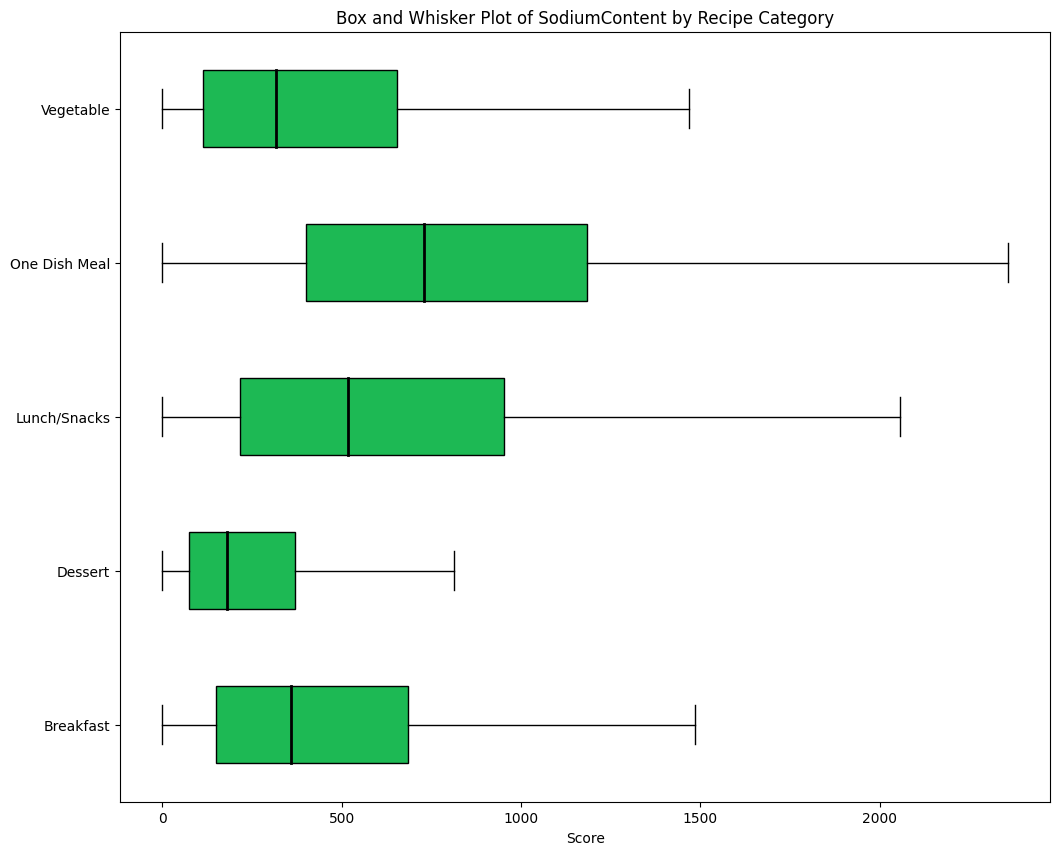

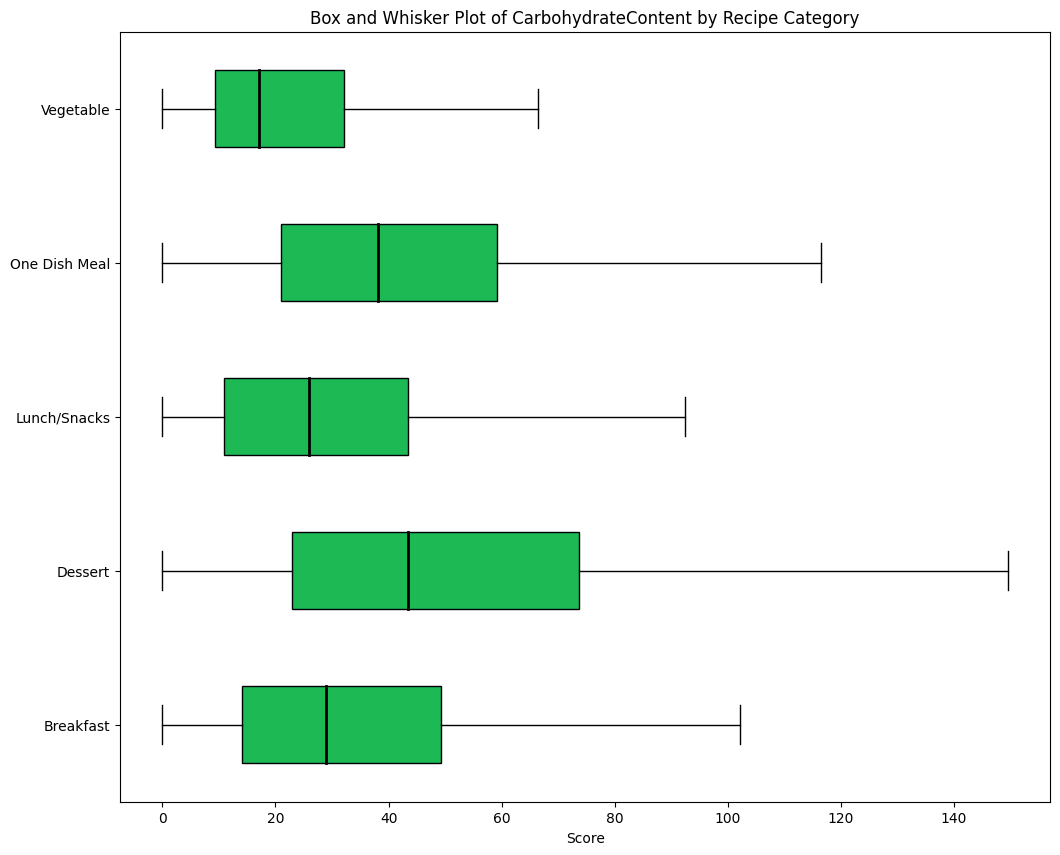

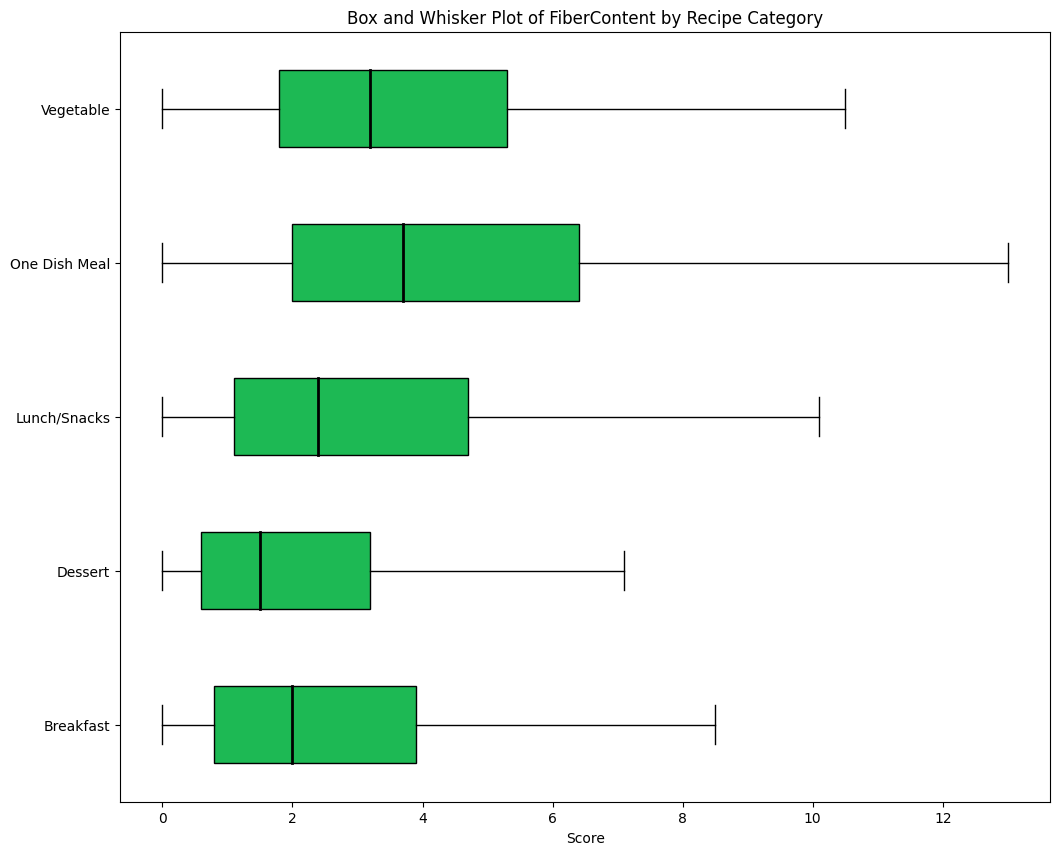

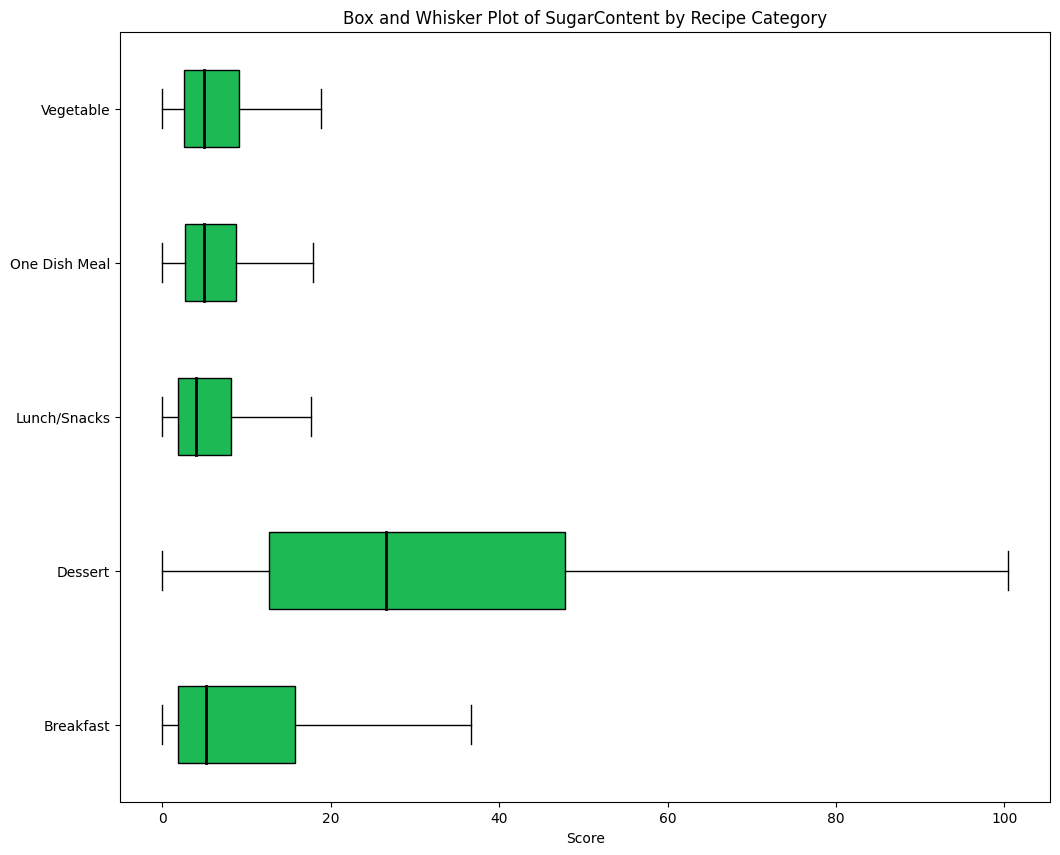

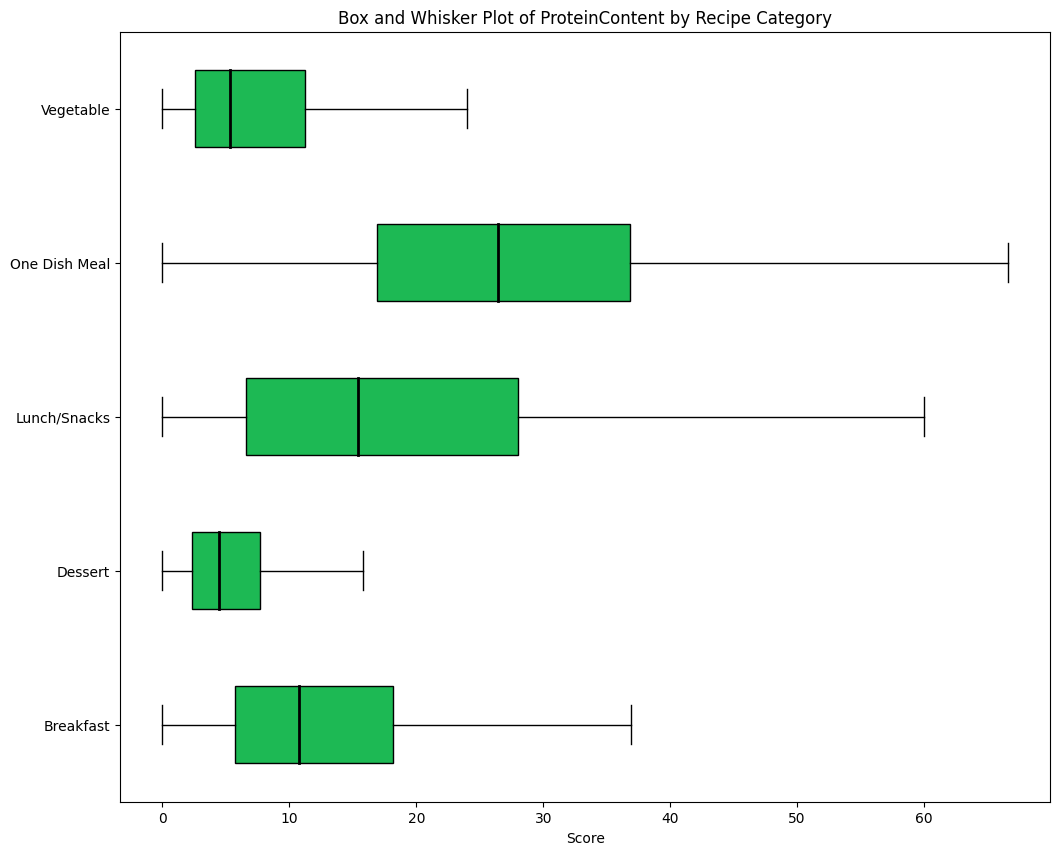

In [ ]:
# Let's look at the top 5 categories and look at some data for them
def convert_time(row):

  amount = 0

  time_str = row['TotalTime'][2:]
  mins = 0
  hrs = 0

  curr_num = 0
  last = 0
  for i in range(len(time_str)):
    if not time_str[i].isdigit():
      if time_str[i] == 'H':
        hrs = int(time_str[last:i])
        last = i+1
      elif time_str[i] == 'M':
        mins = int(time_str[last:i])

  return hrs * 60 + mins

food_com_recipe_data['TotalTimeConverted'] = food_com_recipe_data.apply(lambda row: convert_time(row), axis=1)

print(food_com_recipe_data[['TotalTime', 'TotalTimeConverted']])

top_five_categories = food_com_recipe_data['RecipeCategory'].value_counts().nlargest(5).index

filtered_data = food_com_recipe_data[food_com_recipe_data['RecipeCategory'].isin(top_five_categories)]

def create_plot_comparison(col):
  grouped = filtered_data.groupby('RecipeCategory')[col].apply(list)
  categories = grouped.index.tolist()
  data = grouped.tolist()

  plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
  plt.boxplot(data, vert=False, patch_artist=True,
              medianprops=dict(linestyle='-', linewidth=2, color='black'),
              boxprops=dict(facecolor='#1DB954'), showfliers=False)

  # Setting the labels for each boxplot
  plt.yticks(range(1, len(categories) + 1), categories)

  plt.xlabel('Score')
  plt.title('Box and Whisker Plot of ' + col + ' by Recipe Category')
  plt.show()


interest_cols = ['Calories', 'FatContent',
       'SaturatedFatContent', 'CholesterolContent', 'SodiumContent',
       'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent']

for col in interest_cols:
  create_plot_comparison(col)


        RecipeId                                              Name  \
0             38                 Low-Fat Berry Blue Frozen Dessert   
1             39                                           Biryani   
2             40                                     Best Lemonade   
3             41                    Carina's Tofu-Vegetable Kebabs   
4             42                                      Cabbage Soup   
...          ...                                               ...   
522512    541379                    Meg's Fresh Ginger Gingerbread   
522513    541380  Roast Prime Rib au Poivre with Mixed Peppercorns   
522514    541381                             Kirshwasser Ice Cream   
522515    541382          Quick & Easy Asian Cucumber Salmon Rolls   
522516    541383                           Spicy Baked Scotch Eggs   

          AuthorId      AuthorName CookTime PrepTime TotalTime  \
0             1533          Dancer    PT24H    PT45M  PT24H45M   
1             1567        e

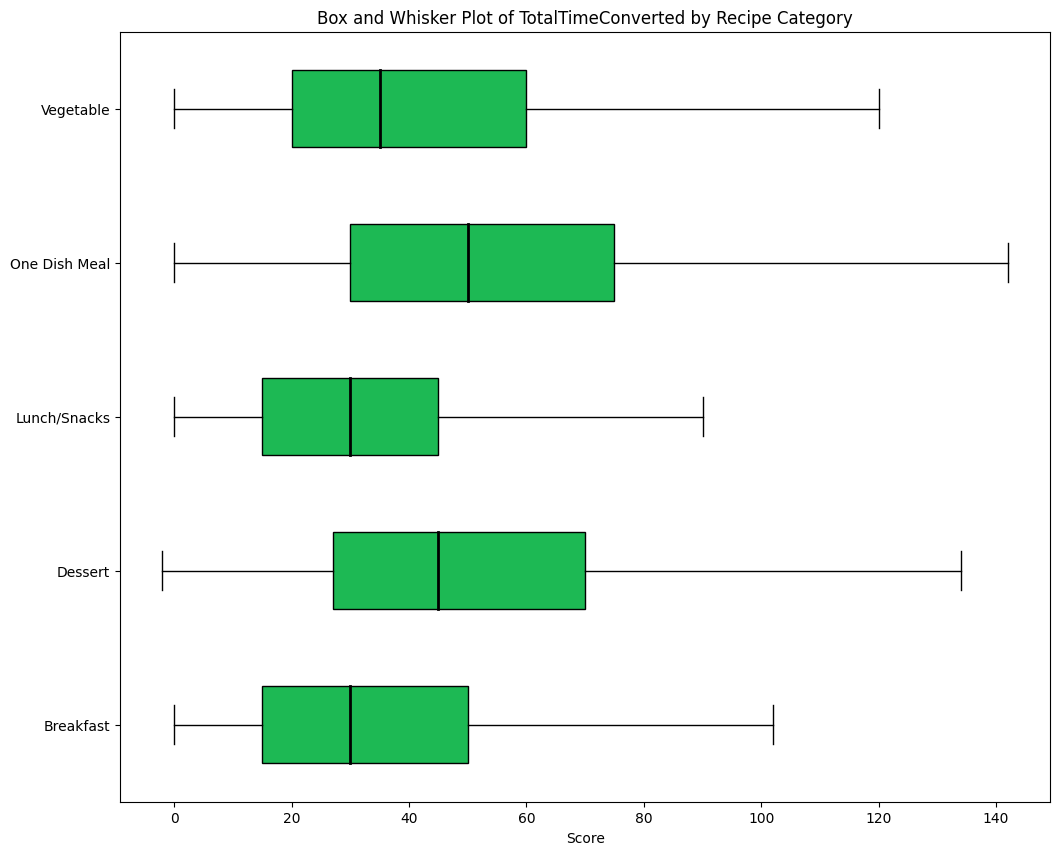

In [ ]:
print(food_com_recipe_data)
create_plot_comparison('TotalTimeConverted')

In [ ]:
# Basic clustering on just calories and protein (for workouts)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()

cals_and_protein = food_com_recipe_data[['RecipeId', 'Name', 'Calories', 'ProteinContent']]

cals_and_protein[['Calories', 'ProteinContent']] = scaler.fit_transform(cals_and_protein[['Calories', 'ProteinContent']])

def get_neighbors(df, desired, topn):

  scaled_input = scaler.transform([desired])

  df_copy = df.copy()

  df_copy['similarity'] = cosine_similarity(df[['Calories', 'ProteinContent']], scaled_input)

  similar_recipes = df_copy.sort_values(by='similarity', ascending=False).head(topn)
  print('Scaled Content:', scaled_input)
  return similar_recipes[['RecipeId', 'Name', 'Calories', 'ProteinContent']]

sims = get_neighbors(cals_and_protein, [700, 25], 10)

print(food_com_recipe_data[food_com_recipe_data['RecipeId'].isin(sims['RecipeId'])][['Name', 'Calories', 'ProteinContent']])



<ipython-input-7-fafe69678a78>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cals_and_protein[['Calories', 'ProteinContent']] = scaler.fit_transform(cals_and_protein[['Calories', 'ProteinContent']])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Scaled Content: [[0.0011422  0.00135898]]
                                                     Name  Calories  \
22267                  Cucusebzaminee ( Iranian Potatoes)     352.8   
84668                             Low Cal Yummy Fruit Dip      56.0   
109059    Minestra Di Cipolle Con Gorgonzola E Prosciutto     644.0   
166875                                   Two Tomato Salsa      42.0   
238432                          Beth's Warm Artichoke Dip     324.8   
305320                              Squash and Apple Soup     142.8   
397240            Best Ever Red &amp; White Sauce Lasagna     756.0   
418073                          Smoked Salmon Pasta Salad     470.4   
451528                  Thai - Style Coconut Chicken Soup     551.6   
501242  Risotto With Fresh Mozzarrella, Grape Tomatoes...     369.6   

        ProteinContent  
22267             12.6  
84668              2.0  
109059            23.0  
166875             1.5  
238432            11.6  
305320             5.1  
3

Institute seeding such that user can rate the top 10 most similar recipes to the macros they want. Macros limited to protein, fat

In [ ]:
# SEEDING TIMEEE
# Given user input of calories, fat, carbs, and protein, get the top 10
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler, StandardScaler

fScaler = MinMaxScaler()

input = [700, 25, 40, 65]

needed_cols = ['RecipeId', 'Name', 'RecipeCategory', 'Calories', 'ProteinContent', 'FatContent', 'CarbohydrateContent']

filtered_data = food_com_recipe_data[needed_cols]

filtered_data[['Calories', 'ProteinContent', 'FatContent', 'CarbohydrateContent']] = fScaler.fit_transform(filtered_data[['Calories', 'ProteinContent', 'FatContent', 'CarbohydrateContent']])

def get_seed_recipes(input, df, scaler, topn):
  scaled_input = scaler.transform([input])

  sim_scores = cosine_similarity(df[['Calories', 'ProteinContent', 'FatContent', 'CarbohydrateContent']], scaled_input).flatten()

  sim_recipes = df.assign(SimScores=sim_scores).sort_values(by='SimScores', ascending=False)

  seeds = sim_recipes.head(topn)
  return seeds

get_seed_recipes(input, filtered_data, fScaler, 10)

<ipython-input-24-acfd7195c557>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[['Calories', 'ProteinContent', 'FatContent', 'CarbohydrateContent']] = fScaler.fit_transform(filtered_data[['Calories', 'ProteinContent', 'FatContent', 'CarbohydrateContent']])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


,RecipeId,Name,RecipeCategory,Calories,ProteinContent,FatContent,CarbohydrateContent,SimScores
108016,113798,Corn and Sausage Chowder,Chowders,0.000837,0.000995,0.000455,0.000442,0.999998
444218,460601,Poached Eggs With Asparagus,Breakfast,0.000761,0.000908,0.000412,0.000402,0.999997
29414,33004,Chunky Fresh Tomato Soup,One Dish Meal,0.000786,0.000935,0.000424,0.000411,0.999996
382236,395998,Green Bean Casserole,Beans,0.000478,0.000571,0.000263,0.000253,0.999996
419295,434723,Eggplant Casserole,Vegetable,0.000521,0.000620,0.000281,0.000275,0.999995
294635,306122,Greek Fit-For-The-Gods Salad With Spicy Cucumb...,Onions,0.001119,0.001332,0.000607,0.000596,0.999993
459012,475933,Shepherd&rsquo;s Pie Twice-Baked Potatoes,Potato,0.001498,0.001767,0.000808,0.000780,0.999992
210025,219088,Cashew-Chicken Rotini Salad,Penne,0.000985,0.001169,0.000528,0.000512,0.999990
516851,535500,Scalloped Potatoes (Au Gratin),Vegetable,0.000673,0.000799,0.000360,0.000350,0.999987
485996,503940,"Minty Carrot, Pistachio and Feta Salad",Moroccan,0.000569,0.000674,0.000314,0.000299,0.999986
